In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# Font modification
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18


In [78]:
targets = pd.read_csv('../data/TenderometerData - Sheet1.csv', usecols=[3,4,5,6])
targets.columns = ['Spectra', 'Tend1', 'Tend2', 'Tend3']
targets.head()

,Spectra,Tend1,Tend2,Tend3
0,1,93,94.0,96
1,2,93,94.0,96
2,3,93,94.0,96
3,4,93,94.0,96
4,5,77,76.0,76


In [79]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 4 columns):
Spectra    703 non-null int64
Tend1      699 non-null object
Tend2      691 non-null float64
Tend3      683 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 22.0+ KB


In [80]:
targets.replace('-', np.nan, inplace=True)
targets.replace('kj ', np.nan, inplace=True)
targets.replace('0', np.nan, inplace=True)
targets.describe()

,Spectra,Tend2
count,703.000000,691.000000
mean,105.204836,88.700434
std,91.193312,11.392916
min,1.000000,67.000000
25%,24.000000,81.000000
50%,79.000000,88.000000
75%,166.500000,96.000000
max,324.000000,134.000000


In [81]:
targets['Tend1'].unique()

array(['93', '77', '94', '97', '87', '92', '82', '89', '68', '76', '66',
       '74', '80', '104', '75', '100', '109', '86', '106', '69', '72',
       '67', '79', '112', '95', '105', '111', '71', '78', '83', '113',
       '88', '102', '84', '85', '91', '90', '81', '98', '115', '103',
       '108', '101', '64', '70', '136', '96', '110', nan, '73'],
      dtype=object)

In [82]:
targets['Tend1'] = targets['Tend1'].astype('float64')
targets['Tend2'] = targets['Tend2'].astype('float64')
targets['Tend3'] = targets['Tend3'].astype('float64')

In [83]:
targets.describe()

,Spectra,Tend1,Tend2,Tend3
count,703.000000,698.000000,691.000000,655.000000
mean,105.204836,88.840974,88.700434,89.835115
std,91.193312,11.979738,11.392916,11.404851
min,1.000000,64.000000,67.000000,68.000000
25%,24.000000,80.000000,81.000000,81.000000
50%,79.000000,88.000000,88.000000,91.000000
75%,166.500000,97.000000,96.000000,98.000000
max,324.000000,136.000000,134.000000,133.000000


In [84]:
targets.head()

,Spectra,Tend1,Tend2,Tend3
0,1,93.0,94.0,96.0
1,2,93.0,94.0,96.0
2,3,93.0,94.0,96.0
3,4,93.0,94.0,96.0
4,5,77.0,76.0,76.0


In [85]:
targets.dropna(subset=['Tend1', 'Tend2', 'Tend3'], how='all', axis=0, inplace=True)

In [86]:
targets.tail(15)

,Spectra,Tend1,Tend2,Tend3
684,170,95.0,94.0,99.0
685,171,95.0,94.0,99.0
686,172,95.0,94.0,99.0
691,177,68.0,71.0,NaN
692,178,68.0,71.0,NaN
693,179,68.0,71.0,NaN
694,180,68.0,71.0,NaN
695,181,92.0,89.0,95.0
696,182,92.0,89.0,95.0
697,183,92.0,89.0,95.0


In [87]:
samples = [targets[['Tend1', 'Tend2', 'Tend3']].iloc[0].tolist()]

for line in targets[['Tend1', 'Tend2', 'Tend3']].itertuples():
    currentline = [x for x in line[1:] if not np.isnan(x)]
    
    if currentline != samples[-1]:
        #print('new')
        samples.append(currentline)
    #print(currentline, samples[-1])

In [88]:

targets = pd.DataFrame(samples, columns=['Tend1', 'Tend2', 'Tend3'])
targets.head()

,Tend1,Tend2,Tend3
0,93.0,94.0,96.0
1,77.0,76.0,76.0
2,94.0,91.0,99.0
3,77.0,78.0,76.0
4,97.0,88.0,98.0


In [89]:
targets.reset_index(inplace=True)

In [90]:
targets.rename(columns={'index':'Sample'}, inplace=True)
targets.head()

,Sample,Tend1,Tend2,Tend3
0,0,93.0,94.0,96.0
1,1,77.0,76.0,76.0
2,2,94.0,91.0,99.0
3,3,77.0,78.0,76.0
4,4,97.0,88.0,98.0


In [91]:

targets.head()

,Sample,Tend1,Tend2,Tend3
0,0,93.0,94.0,96.0
1,1,77.0,76.0,76.0
2,2,94.0,91.0,99.0
3,3,77.0,78.0,76.0
4,4,97.0,88.0,98.0


In [92]:
targets = targets.melt('Sample').drop('variable', axis=1).rename(columns={'value':'Targets'})
targets.head()

,Sample,Targets
0,0,93.0
1,1,77.0
2,2,94.0
3,3,77.0
4,4,97.0


In [93]:
targets.dropna(axis=0, inplace=True)

In [94]:
targets.head()

,Sample,Targets
0,0,93.0
1,1,77.0
2,2,94.0
3,3,77.0
4,4,97.0


In [95]:
dictmean = targets.groupby('Sample').mean().to_dict()['Targets']
targets['tmean'] = targets['Sample'].apply(lambda x:dictmean.get(x, np.nan))
targets.head()

,Sample,Targets,tmean
0,0,93.0,94.333333
1,1,77.0,76.333333
2,2,94.0,94.666667
3,3,77.0,77.000000
4,4,97.0,94.333333


In [96]:
targets[targets['Sample']==0]

,Sample,Targets,tmean
0,0,93.0,94.333333
176,0,94.0,94.333333
352,0,96.0,94.333333


In [97]:
targets = targets[targets['tmean']<130]

In [98]:
targets['dev'] = targets['tmean'] - targets['Targets']
targets['dev'].head()

0    1.333333
1   -0.666667
2    0.666667
3    0.000000
4   -2.666667
Name: dev, dtype: float64

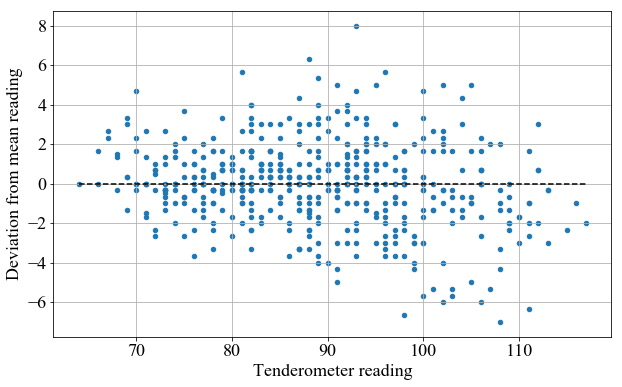

In [99]:
targets.plot.scatter('Targets', 'dev', figsize=(10,6))
plt.plot([targets['Targets'].min(), targets['Targets'].max()], [0, 0], color='k', linestyle='--')
plt.xlabel('Tenderometer reading')
plt.ylabel('Deviation from mean reading')
plt.grid()
plt.savefig('targets - residual.png', bbox_inches='tight')
plt.show()


In [100]:
targets['dev2'] = targets['dev']**2
np.sqrt(targets['dev2'].mean())

2.09673121796557